In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegression
from extrapolation import *
from experiments import RestartingExperiment

In [14]:
df = pd.read_csv("../Epicurious/epi_r.csv")
df = df.dropna(axis="rows")

In [49]:
X = df.drop(["title", "dessert"], axis="columns").values
y = df["dessert"].values
y = np.where(y > 0.5, 1, -1)

In [50]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [51]:
device = "cuda"

X_train = torch.tensor(X_train, device=device)
X_test = torch.tensor(X_test, device=device)
y_train = torch.tensor(y_train, device=device)
y_test = torch.tensor(y_test, device=device)

In [68]:
model = LogisticRegression(X_train, y_train, 1e-2, device=device)

In [69]:
model.run_steps(50500)

In [70]:
len(model.log)

50501

In [71]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.6639, device='cuda:0', dtype=torch.float64)

In [73]:
experiment = RestartingExperiment(model, 5, device="cuda")

In [74]:
n = 8000

In [75]:
experiment.run_method("RRE+QR", RRE, n, {"qr": True})

In [76]:
experiment.run_method("RNA", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": False, "norm": False})

In [77]:
experiment.run_method("RNA+norm", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [78]:
experiment.run_method("RNA+ls", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": True})

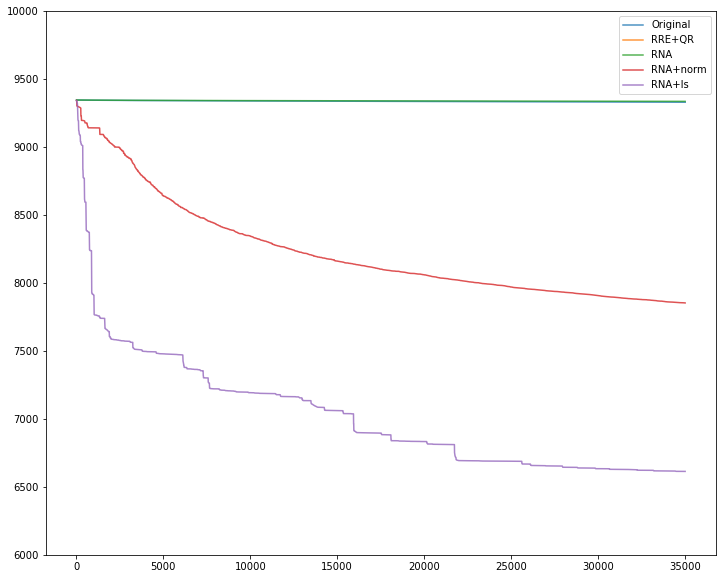

In [88]:
experiment.plot_values(n=35000, figsize=(12, 10), ylim=(6000, 10000))

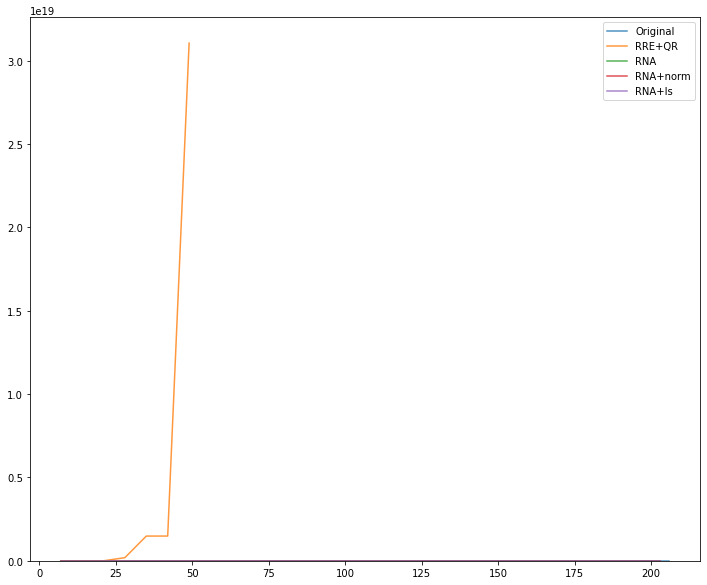

In [91]:
experiment.plot_values(n=200, figsize=(12, 10), ylim=(7000, None))

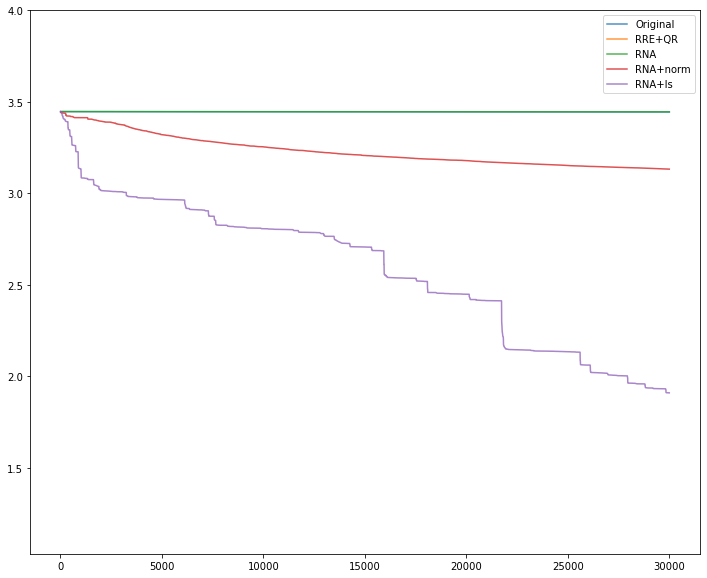

In [93]:
experiment.plot_log_diff(n=30000, figsize=(12, 10), ylim=(None, 4))

In [94]:
experiment.save("epicurous-restarts-k=5.p")

In [100]:
experiment = RestartingExperiment(model, 10, device="cuda")

In [101]:
n = 4000

In [102]:
experiment.run_method("RRE+QR", RRE, n, {"qr": True})

In [103]:
experiment.run_method("RNA", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": False, "norm": False})

In [104]:
experiment.run_method("RNA+norm", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": False})

In [105]:
experiment.run_method("RNA+ls", RNA, n, {"lambda_range": (1e-15, 1e-2), "linesearch": True})

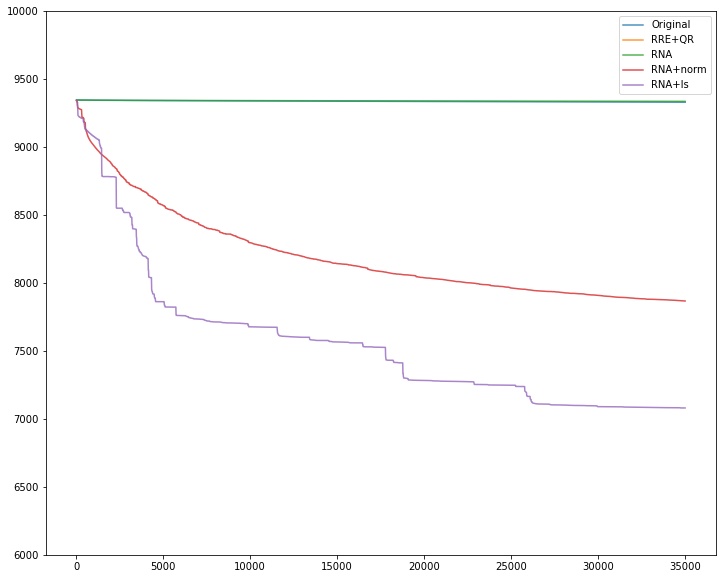

In [106]:
experiment.plot_values(n=35000, figsize=(12, 10), ylim=(6000, 10000))

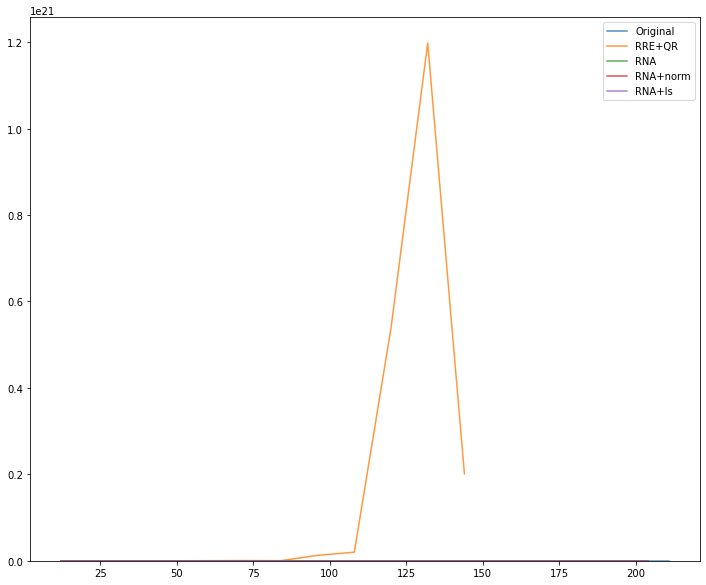

In [107]:
experiment.plot_values(n=200, figsize=(12, 10), ylim=(7000, None))

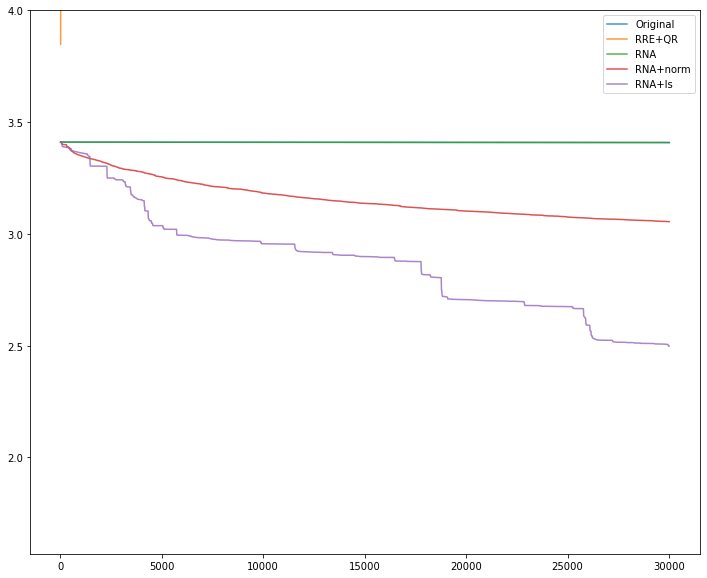

In [108]:
experiment.plot_log_diff(n=30000, figsize=(12, 10), ylim=(None, 4))

In [109]:
experiment.save("epicurous-restarts-k=10.p")